# **Customer Lifetime Value**
### [Data Source](https://www.kaggle.com/datasets/pankajjsh06/ibm-watson-marketing-customer-value-data)
----


## **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**


**Context**

In today's competitive business world, companies must be savvy enough in terms of financial management. Instead of focusing on acquiring new customers, it is far more efficient and cost-friendly to maintain existing customers. Therefore, understanding and maximizing Customer Lifetime Value (CLV) has become a necessity to increase the performance of its financial strategy.

CLV represents the total financial value generated by a customer throughout their entire business relationship. It takes into account not only the value of their initial purchase but also their potential future purchases and the duration of their engagement with the company. By analyzing CLV, businesses can gain insights into customer profitability and make informed decisions to ensure long-term financial stability and growth. Consequently, CLV is a fundamental metric that significantly affects a company's finance

By estimating the potential revenue a customer is expected to generate over their lifetime, CLV helps businesses understand the financial impact of nurturing and retaining customer relationships. This insight allows companies to identify high-value customers and prioritize resource allocation to focus on retaining and maximizing their contribution to the company's revenue stream. Moreover, CLV analysis provides insights into customer profitability. By comparing the CLV of different customer segments, businesses can identify which groups are more profitable relative to the cost of acquiring and serving them. This knowledge enables companies to direct efforts toward customer segments that offer higher profitability. By optimizing resource allocation based on CLV, businesses can enhance profitability and overall financial performance.

**Problem Statement**

An automobile insurance company in the United States is currently facing the challenge of effectively managing Customer Lifetime Value (CLV) to drive sustainable revenue growth. Due to their limited understanding of the market-specific dynamics of CLV, the company lacks valuable insights into customer behavior and profitability. As a result, they struggle to allocate their budget accurately, hindering their ability to maximize overall financial performance. Therefore, the company is in urgent need of a more accurate CLV prediction model that can provide especially the marketing and finance departments with the necessary tools to identify high-value customers, implement targeted marketing efforts, and ultimately enhance their revenue generation potential.

**Goals**

The primary objective is to develop an advanced predictive model and data-driven tools that leverage customers' data and its insurance information to accurately estimate Customer Lifetime Value (CLV). By achieving this goal, the company aims to automate the CLV calculation process, reduce manual efforts, and expedite the decision-making process. This will lead to enhanced revenue generation potential and improved overall financial performance for the company. This goals will definitely help the stakeholders within the company, including marketing and finance departments.

**Analytic Approach**

Analyze customer data in the car insurance market is needed to identify patterns and behaviors that contribute to Customer Lifetime Value (CLV). 

Next, we will develop a regression model that will assist the company in providing a predictive tool for estimating Customer Lifetime Value (CLV) in the car insurance industry. This tool will be valuable for the company to determine the CLV of their customers and optimize marketing strategies accordingly.

**Metric Evaluation**

The evaluation metrics that will be utilized are RMSE (Root Mean Square Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error). RMSE represents the average square root of the errors, MAE represents the average absolute value of the errors, while MAPE represents the average percentage error generated by the regression model. Lower values of RMSE, MAE, and MAPE indicate that the model is more accurate in predicting rental prices based on the limitations of the features used.

## **Data Understanding**

- The following dataset consist of customers data on car insurance in the United States on 2019
- Each row of data represents information related to insurance coverage and its owner.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Types of Vehicles (4-Door, Luxury, Luxury SUV, Sports Car, SUV, 2-Door) |
| Coverage | Object | Types of policies (Basic, Extended, Premium) |
| Renew Type Offer | Object | Types of policies renewal offers (Offer 1, Offer 2, Offer 3, Offer 4) |
| EmploymentStatus | Object | Customers' employment status |
| Marital Status | Object | Customers' marital status |
| Education | Object | Educational Levels of Customers |
| Number of Policies | Float | Number of policies currently wwned by customers |
| Monthly Premium Auto | Float | Customers' Monthly Insurance Costs |
| Total Claim Amount | Float | Cumulative sum of all claims since policy inception (Beginning of the policy) |
| Income | Float | Customers' annual income (USD) |
| Customer Lifetime Value | Float | Total value a customer brings to the business |

<br>

In [44]:
# Import the necessary libraries for analysis and exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train test split
from sklearn.model_selection import train_test_split 

# Encoding & Scaling
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Column transformer & Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


# Algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import BaggingRegressor, StackingRegressor, VotingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [45]:
# Load Dataset
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [46]:
df.info()
# Check dataset information (Datatype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [182]:
display(df.describe(), df.describe(include= 'object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


Based on the information provided, it is understood that there may be customers who have no income or are unemployed.

## **Exploratory Data Analysis**

Target = Customer Lifetime Value

## Distribution of Customer Lifetime Value

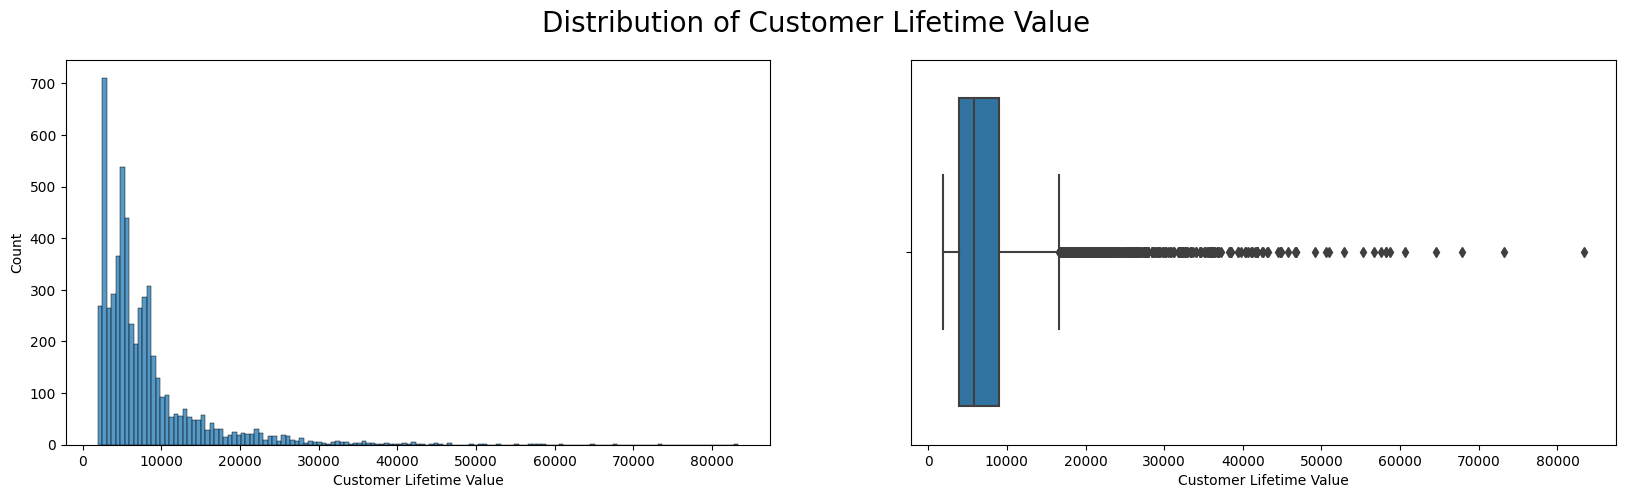

In [47]:
# Customer Lifetime Value distribution & box plot
plt.figure(figsize=(20, 5)).suptitle('Distribution of Customer Lifetime Value', size=20)

plt.subplot(1,2,1)
sns.histplot(data=df, x='Customer Lifetime Value')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Customer Lifetime Value');

In [48]:
from scipy.stats import kurtosis
kurtosis(df['Customer Lifetime Value'])

14.341967653924755

The distribution of Customer Lifetime Value is not normally distributed; it exhibits a right-skewed pattern with numerous outliers exceeding the upper bound. This skewness is also visible in the histogram, which illustrates a significant disparity in values between customers with low CLV compared to those with high CLV. The kurtosis is also higher than 3, which indicates leptokurtosis (a distribution with heavier tails and a higher peak compared to the normal distribution)

## Numerical Features' Distributions and its Correlation with Target

In [49]:
df.describe().columns

Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Income', 'Customer Lifetime Value'],
      dtype='object')

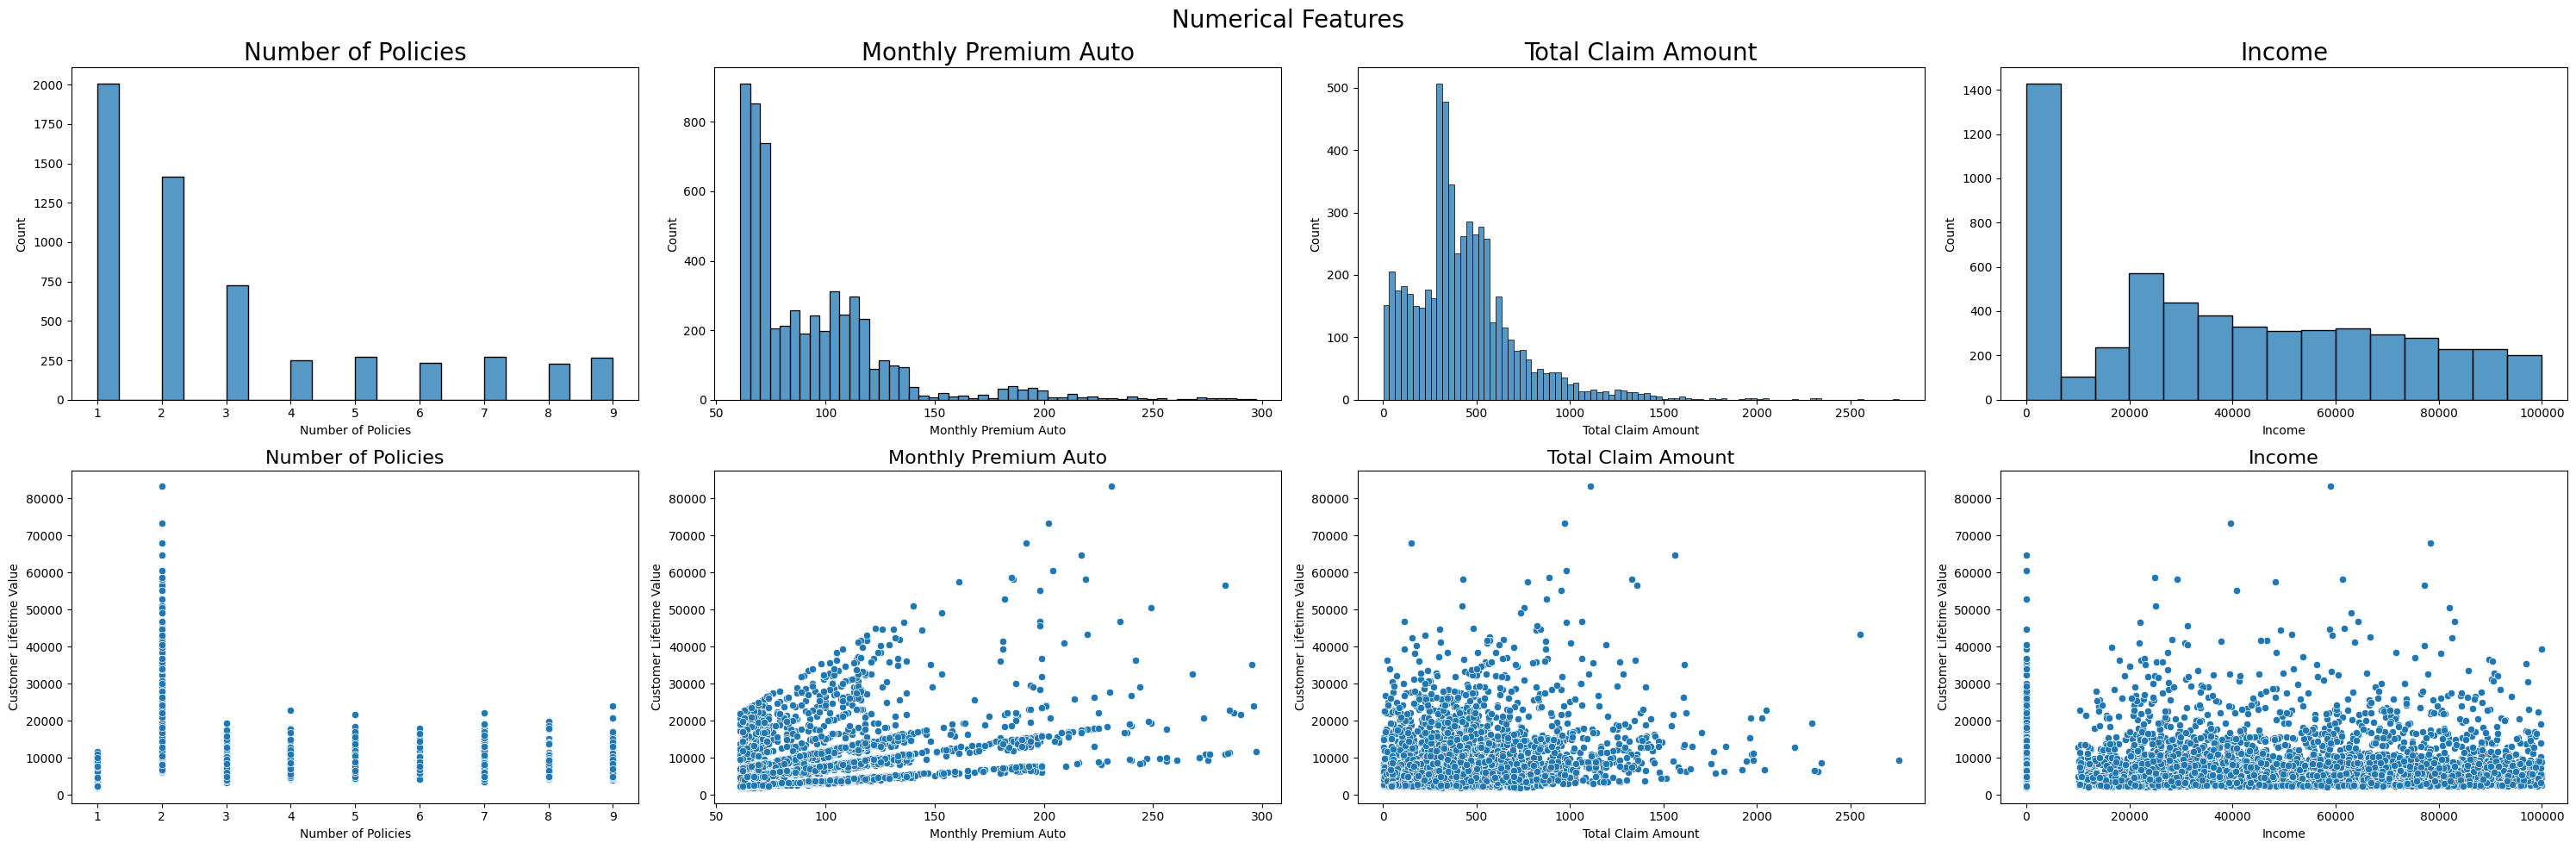

In [183]:
# Creating a list of numerical features excluding the Target.
numcol = list(df.describe().columns[:-1])

# Creating histograms of the numerical features, and scatterplot for its correlation with Target
plt.figure(figsize=(30, 10))
plt.suptitle('Numerical Features', fontsize= 20)
num_subplot = 1

for i in numcol:
    plt.subplot(2, 4, num_subplot)
    sns.histplot(data=df, x=i)
    plt.title(i, size=20)
    plt.tight_layout()
    num_subplot += 1

num_subplot = 1
for i in numcol:
    plt.subplot(2, 4, num_subplot + 4)
    sns.scatterplot(data=df, x=i, y='Customer Lifetime Value')
    plt.title(i, size=16)
    plt.tight_layout()
    num_subplot += 1

plt.show()

The histograms shown above indicate that all numerical features are not normally distributed. The scatter plots provide valuable insights into each feature=

**Number of Policies**= The CLV for customers with a single policy (1) is roughly the same as for customers with multiple policies (ranging from 3 to 9), except for customers with two policies. Those with two policies tend to have a higher CLV, suggesting that having 2 policies may increase customer value. The total number of customers may also affect the results, since customer counts who have 2 policies are roughly 5x higher than customers who has 4 or more policies

**Monthly Premium Auto**= The scatter plot shows a clear pattern where higher monthly premiums correspond to higher CLV. This indicates that customers with higher monthly premiums are generally more valuable to the insurance company.

**Total Claim Amount**= There is no distinct pattern observed in the scatter plot for this feature. However, it is evident that a significant number of customers have claimed insurance amounts ranging from $0 to $1500, irrespective of whether they are low or high-value customers.

**Income**= The scatter plot does not reveal a clear pattern for this feature. Customers with incomes ranging from $20,000 to $100,000 can be classified as valuable or non-valuable customers. Additionally, customers who are unemployed or have no income can also be valuable to the insurance company.

## Categorical Features' Distributions and its Correlation with Target

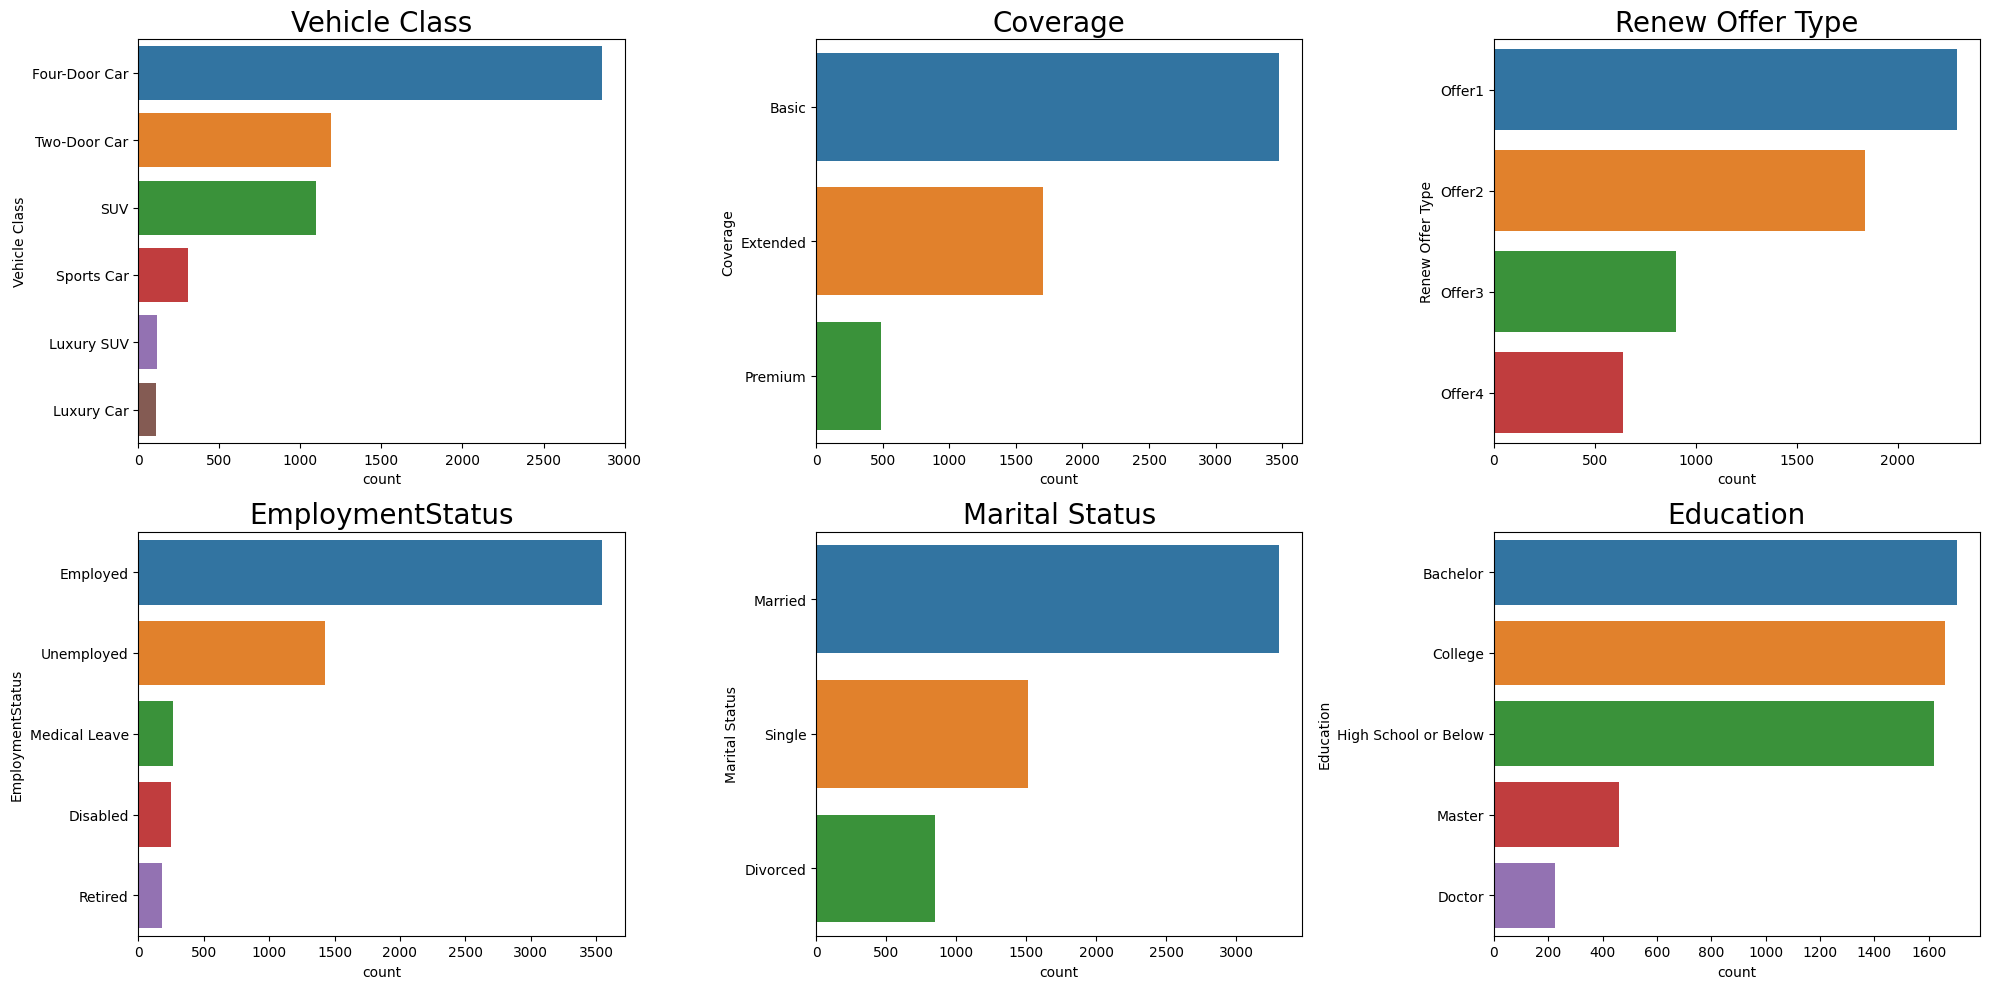

In [51]:
# Creating a list of categorical features
catcol = df.describe(include='object').columns

plt.figure(figsize=(20,10))
num_subplot = 1

for i in catcol:
    plt.subplot(2,3,num_subplot)
    sns.countplot(data=df, y=i,order=df[i].value_counts().index)
    plt.title(i, size=20)
    plt.tight_layout()
    num_subplot+=1

By observing these countplots, several insights can be drawn=

Vehicle Class= The majority of customers insured four-door cars, indicating that this type of vehicle is more commonly insured compared to other classes. Luxurious or expensive car classes have significantly fewer insured cars.

Coverage= Most customers opted for basic coverage for their insurance, suggesting that they prefer a lower level of coverage rather than comprehensive or premium options.

Renew Offer Type= The first offer for renewal is chosen by more than 2000 customers, indicating that it is the most popular option among the available offers.

Employment and Marital Status= The countplots reveal that the majority of customers are employed and married.

Education= Customers with Bachelor's degrees, followed by college graduates and individuals with a high school education or below, are the most common customers. This implies that younger individuals, are more inclined to insure their cars.

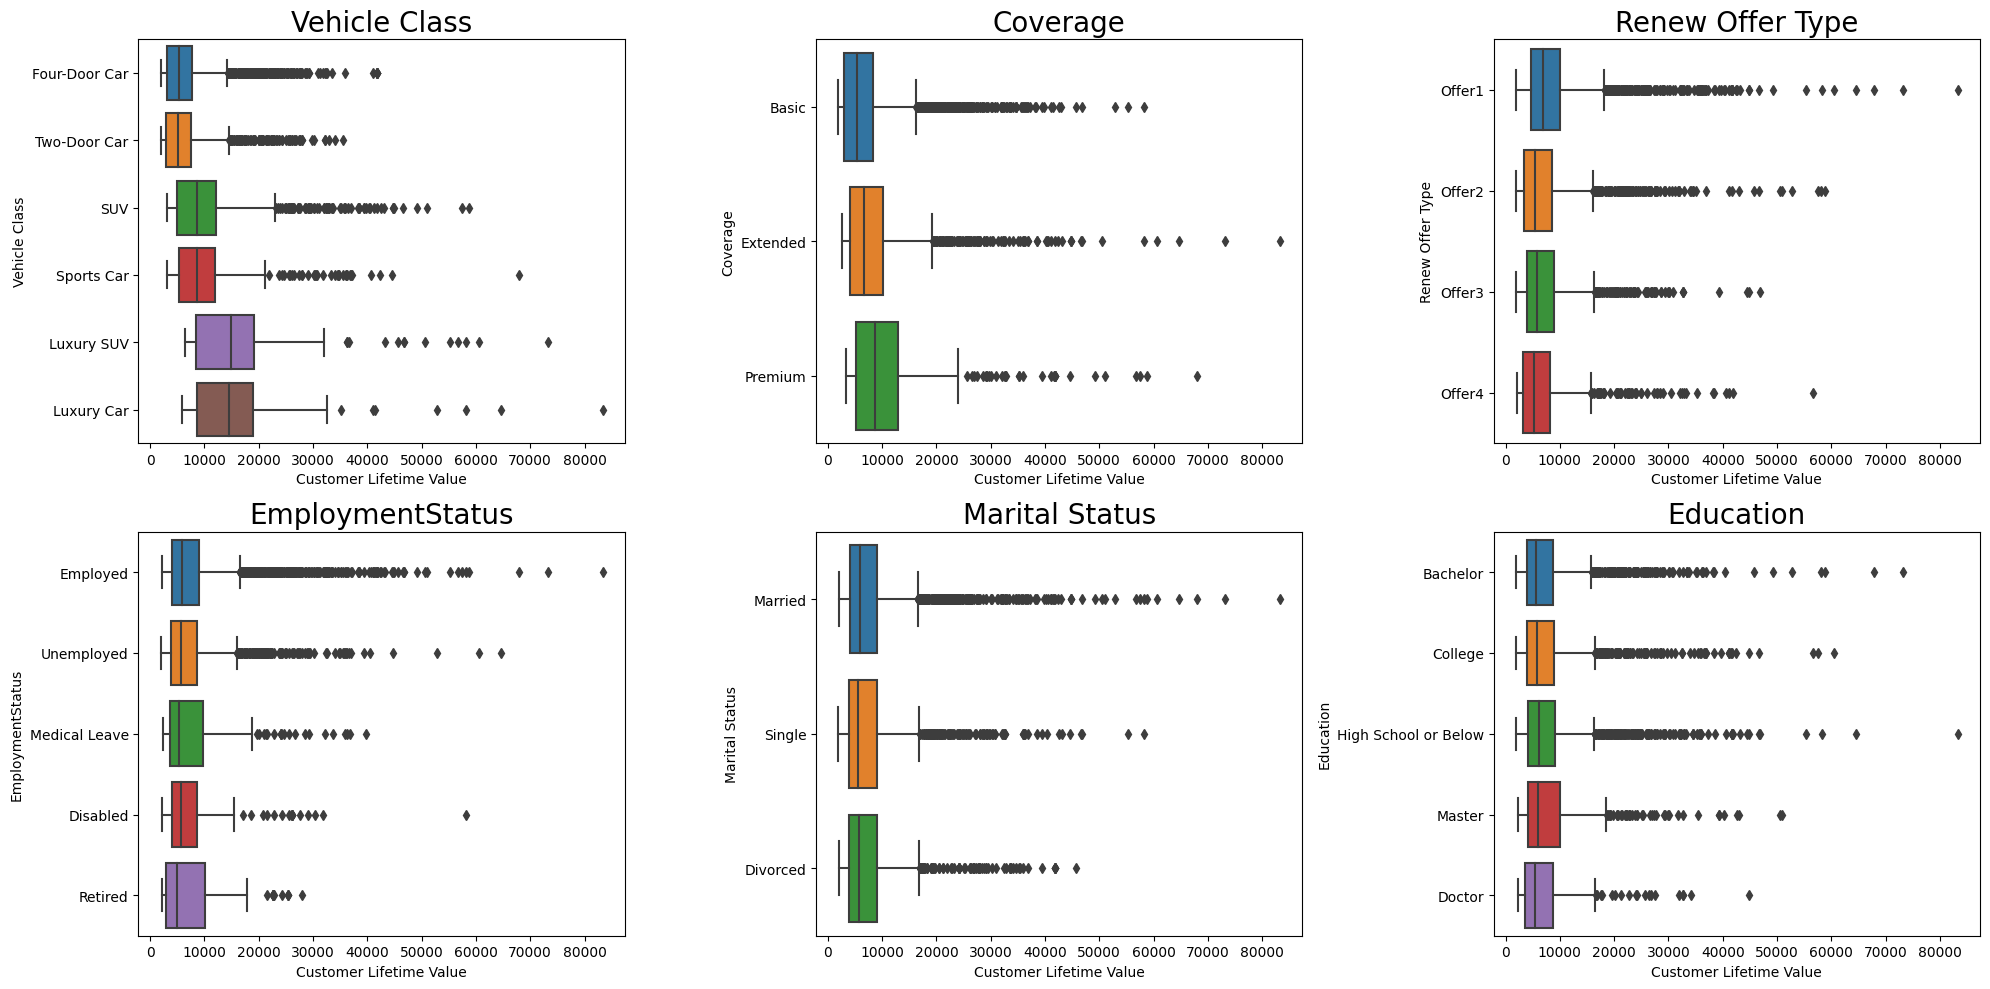

In [52]:
plt.figure(figsize=(20,10))
num_subplot = 1

for i in catcol:
    plt.subplot(2,3,num_subplot)
    sns.boxplot(data=df,x='Customer Lifetime Value', y=i,  order=df[i].value_counts().index)
    plt.title(i, size=20)
    plt.tight_layout()
    num_subplot+=1

From the boxplots shown, several conclusions can be drawn=

Vehicle Class and Coverage= Although luxurious cars are the least insured vehicles, customers who own and insure these cars tend to have higher CLV compared to customers with other types of vehicles. A similar pattern can be observed for coverage choices. Premium coverage is the least commonly chosen option, but customers who opt for premium coverage tend to have higher CLV levels and are considered more valuable.

Renew Offer Type= Customers who choose offer 1 for their renewal offer type demonstrate higher CLV compared to those who select other options. This suggests that the first offer is more appealing or provides better value to customers, leading to increased CLV.

Employment Status, Marital Status, and Education= 
There are only slight differences in CLV between the different categories within these features. However, employed and married customers, as well as those with a master's degree, tend to have slightly higher CLV values compared to the other categories. This implies that employment, marital status, and higher education may contribute to higher customer value.

**Data Correlation**

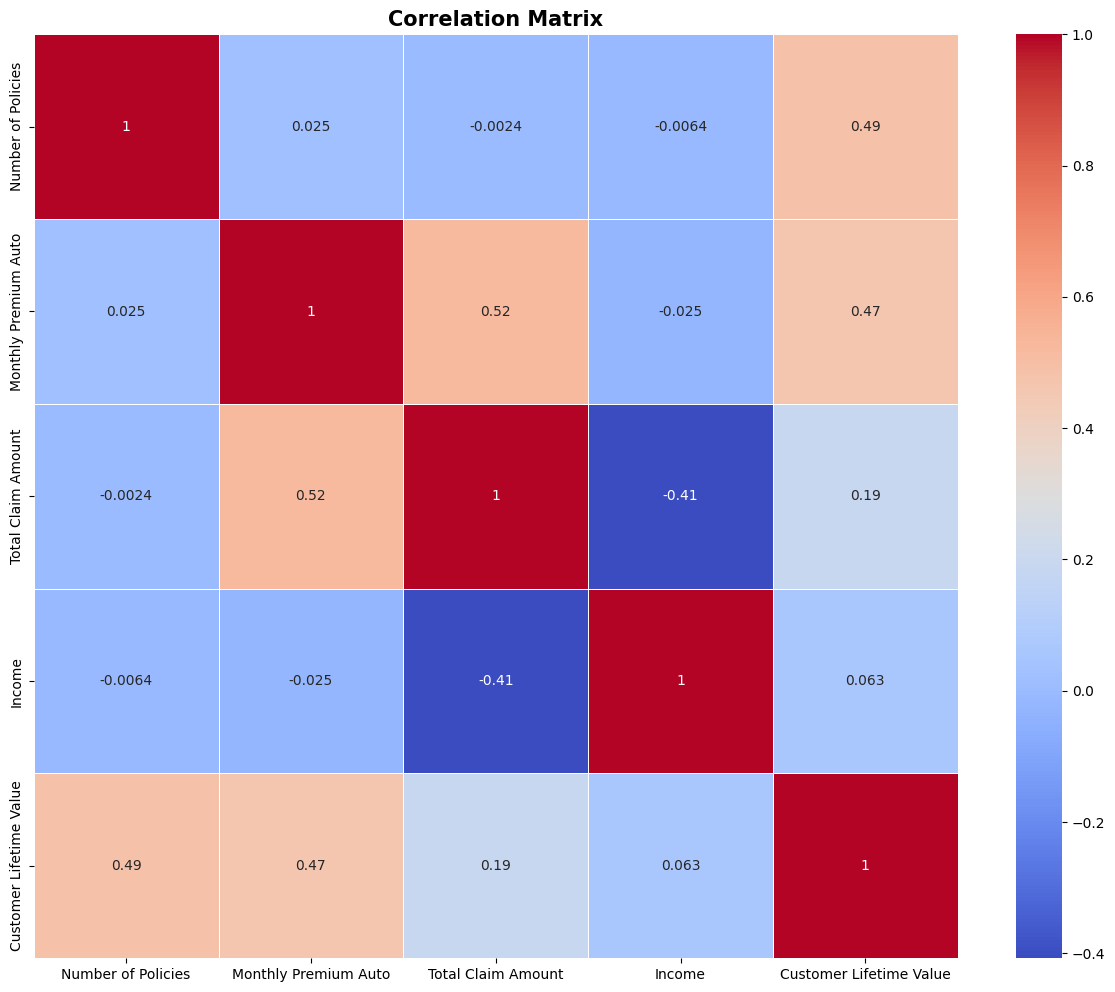

In [ ]:
# Correlation matrix
plt.figure(figsize=(15,12))
corr = df_model.corr('spearman')
palette = 'coolwarm'

sns.heatmap(corr, annot=True, square=True, cmap=palette, linewidths=0.5)
plt.title('Correlation Matrix', size=15, weight='bold');

The heatmap above indicates that there are no strong correlations between the feature 'Customer Lifetime Value' and other numerical variables. The highest correlation is between 'Customer Lifetime Value' and 'Number of Policies' (0.49), followed by 'Monthly Premium Auto' (0.47), which both features has a positive correlation with CLV. On the other hand, the analysis suggests that the other features have weak or negligible correlations with the Customer Lifetime Value, implying that they may not significantly impact the customer's lifetime value in this context.

Next, examine the distribution of each numerical feature and identify any outliers. Having a large number of outliers can potentially impact our modeling and analysis outcomes. Therefore, it is essential for us to address any outliers carefully.

## **Data Cleaning**

In this step, I will perform data cleaning on the dataset to be used for analysis and modeling. The following tasks will include = 
- Dropping duplicated data
    - Removing duplicated data is important to ensure the accuracy and reliability of the analysis. Duplicate data can skew statistical analyses, introduce biases, and mislead the results.
- Handling missing values
- Addressing outliers
    - Handling outliers helps ensure the model's robustness and accuracy by reducing their influence on the analysis. 

To ensure that the  initial dataset remains unchanged throughout the process, a duplicate will be created before implementing these cleaning procedures.

In [53]:
# Duplicate the initial dataset
df_model = df.copy()

In [55]:
df_model.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [56]:
df_model.duplicated().sum()

618

In [57]:
df_model.shape

(5669, 11)

In [58]:
# Duplicated rows
df_model[df_model.duplicated()].head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
188,Sports Car,Basic,Offer2,Unemployed,Married,High School or Below,3.0,119.0,571.200000,0.0,9048.983447
256,Four-Door Car,Basic,Offer1,Retired,Single,Bachelor,1.0,63.0,347.857619,24910.0,2248.449633
331,SUV,Basic,Offer2,Employed,Single,Master,1.0,107.0,513.600000,29462.0,4170.687348
362,SUV,Basic,Offer2,Unemployed,Married,Bachelor,1.0,102.0,660.430456,0.0,3567.503755
366,SUV,Extended,Offer1,Unemployed,Single,College,2.0,126.0,604.800000,0.0,13727.799720


In [54]:
# Check detailed information about each features
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Four-Door Car, Two-Door Car]"
1,Coverage,object,0,0.0,3,"[Extended, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer4, Offer1]"
3,EmploymentStatus,object,0,0.0,5,"[Disabled, Employed]"
4,Marital Status,object,0,0.0,3,"[Married, Divorced]"
5,Education,object,0,0.0,5,"[Doctor, College]"
6,Number of Policies,float64,0,0.0,9,"[2.0, 5.0]"
7,Monthly Premium Auto,float64,0,0.0,191,"[139.0, 155.0]"
8,Total Claim Amount,float64,0,0.0,3274,"[260.627146, 1654.202174]"
9,Income,float64,0,0.0,3625,"[30703.0, 22711.0]"


These data provide us with the information that there are no missing values in the data, but 618 data are duplicates (10.89%). To ensure a more accurate, and unbiased model, it is necessary to drop these duplicated rows. By removing duplicates, we eliminate redundancy and potential bias in the data, allows us to build a more precise and reliable model.

In [59]:
# Drop duplicated data
df_model.drop_duplicates(inplace=True)
df_model.shape

# There are 5051 rows remains in the dataset. 618 rows were removed from the original 5669 rows.

(5051, 11)

After cleaning the dataset from missing values and duplicates, the number of rows decreased from the initial 5669 rows to 5051 rows.

**Outliers Detection**

After cleaning the dataset from missing values and duplicates, it is important to be aware of outliers. Outliers can have an impact on the process of machine learning modeling.

Before deciding how to handle outliers, it is essential to consider domain knowledge and the upper limits of the dataset's features. Understanding the context can help determine whether outliers should be treated or kept.

Handling outliers appropriately is crucial to ensure the reliability and robustness of machine learning models. Outliers can affect the statistical properties of the dataset and introduce bias, leading to inaccurate predictions.

By carefully considering and appropriately addressing outliers, machine learning models can be more reliable and accurate in their predictions.

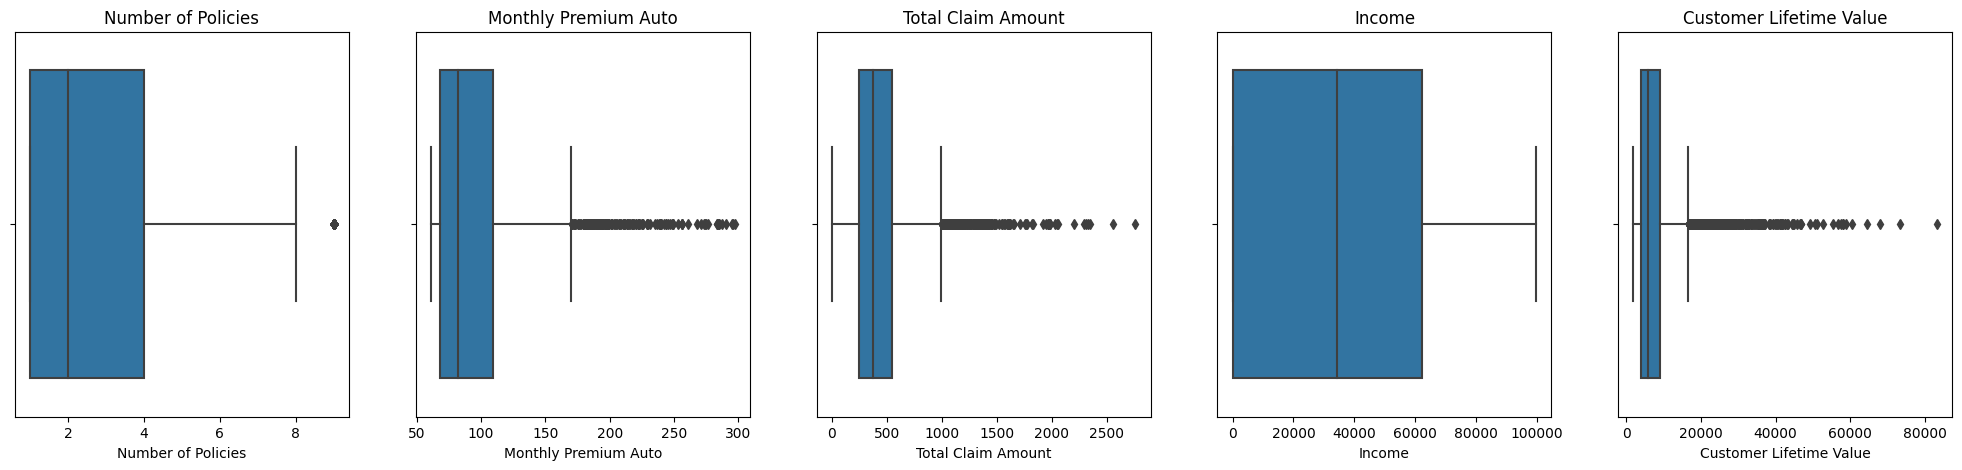

In [62]:
# boxplot to check any outliers 
plt.figure(figsize=(25,5))
num_subplot = 1

for i in df_model.describe().columns:
    plt.subplot(1,5,num_subplot)
    sns.boxplot(data=df_model, x=i),
    plt.title(i),
    num_subplot+=1

There are a significant number of outliers observed in several features. In this project, to prevent potential caused by these outliers, I will perform data engineering on specific features, taking into account a combination of the interquartile range (IQR) method and domain knowledge. The resulting model will only be able to predict values within the data range based on this "clean dataset". 

In [63]:
# Function to detect IQR values
def iqr(data):
    q1 = df_model[data].quantile(0.25)
    q3 = df_model[data].quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR {data}= {iqr}')

    upper = q3 + limit
    lower = q1 - limit
    print(f'Upper Bound= {upper}')
    print(f'Lower Bound= {lower}')

### a. Number of Policies

In [64]:
iqr('Number of Policies')

IQR Number of Policies= 3.0
Upper Bound= 8.5
Lower Bound= -3.5


In [65]:
# Descriptive statistics for 'Number of Policies'
df_model['Number of Policies'].describe()

count    5051.000000
mean        2.992081
std         2.386500
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [66]:
# Check Number of Policies >8.5
df_model[df_model['Number of Policies'] > 8.5].count()['Number of Policies']

228

The upper bound for this feature is 8.5 policies. In which there are 228 customers who have more than 8.5 policies. It is apparent that the maximum number of policies is 9, which is only 0.5 away from the upper limit of this feature. Furthermore, the previous correlation matrix indicates a considerably strong positive correlation with 'Customer Lifetime Value', which potentially important in further modelling. Therefore, I am inclined to retain this outliers in the analysis. 

### b. Monthly Premium Auto

In [67]:
iqr('Monthly Premium Auto')

IQR Monthly Premium Auto= 41.0
Upper Bound= 170.5
Lower Bound= 6.5


In [68]:
# Descriptive statistics for 'Monthly Premium Auto'
df_model['Monthly Premium Auto'].describe()

count    5051.000000
mean       92.911107
std        34.335010
min        61.000000
25%        68.000000
50%        82.000000
75%       109.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [69]:
# Check Monthly Premium Auto >170.5
df_model[df_model['Monthly Premium Auto'] > 170.5].count()['Monthly Premium Auto']

252

The upper limit for Monthly Premium Auto is $170.5, which also indicates that there are 252 customers who has monthly premium higher than $170.5.

Since the dataset contains customer data across the United States, it is also essential to take into account the average premium car insurance in each states. Recent study stated that car insurance in 2019 (source = [link](https://www.bankrate.com/insurance/car/average-cost-of-car-insurance/#car-insurance-cost-by-state)) shows that Michigan has the highest annual full coverage premium ($2693) which cost a customer $224.42 per month.

Based on this information, I revised the upper limit of the Monthly Premium Auto to $224.42. Values above $224.42 in this column will be excluded from the model. This exclusion will have an impact on the limitations of the final model.

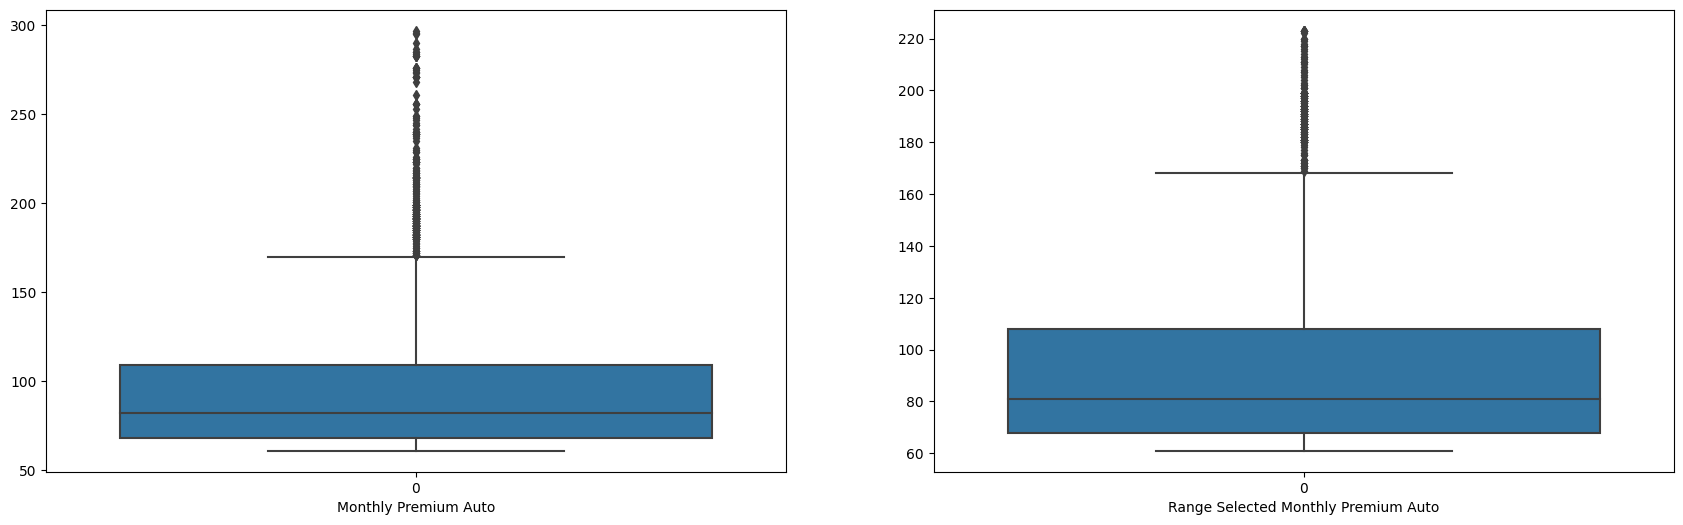

In [70]:
# Filtering
df_model = df_model[(df_model['Monthly Premium Auto'] <= 224.42)]

# Plot distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(df['Monthly Premium Auto'], ax=axes[0])
sns.boxplot(df_model['Monthly Premium Auto'], ax=axes[1])
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');


In [71]:
# Descriptive statistics for 'Monthly Premium Auto' after Filtering
df_model['Monthly Premium Auto'].describe()

count    5006.000000
mean       91.449061
std        30.741228
min        61.000000
25%        68.000000
50%        81.000000
75%       108.000000
max       223.000000
Name: Monthly Premium Auto, dtype: float64

### c. Total Claim Amount

In [72]:
iqr('Total Claim Amount')

IQR Total Claim Amount= 295.40416224999996
Upper Bound= 988.9287933749999
Lower Bound= -192.68785562499994


In [73]:
# Descriptive statistics for 'Total Claim Amount'
df_model['Total Claim Amount'].describe()

count    5006.000000
mean      421.862199
std       276.710997
min         0.423310
25%       250.418388
50%       373.327615
75%       545.822550
max      2552.343856
Name: Total Claim Amount, dtype: float64

In [74]:
# Check Total Claim Amount >970.53
df_model[df_model['Total Claim Amount'] > 988.93].count()['Total Claim Amount']

183

The upper limit of 'Total Claim Amount' is set at $988.93. However, there are 217 customers who have claimed higher than this limit. Qhile dropping these outliers would affect the limitation of our model, it is important to consider using the domain knowledge as well. 

According to a study in 2019, auto claims for comprehensive physical damage (which includes any damage beside collision damage) may reached up to $1929. (source= [link](https://www.iii.org/fact-statistic/facts-statistics-auto-insurance)). Taking this into account, I adjust the upper limit to $1929.

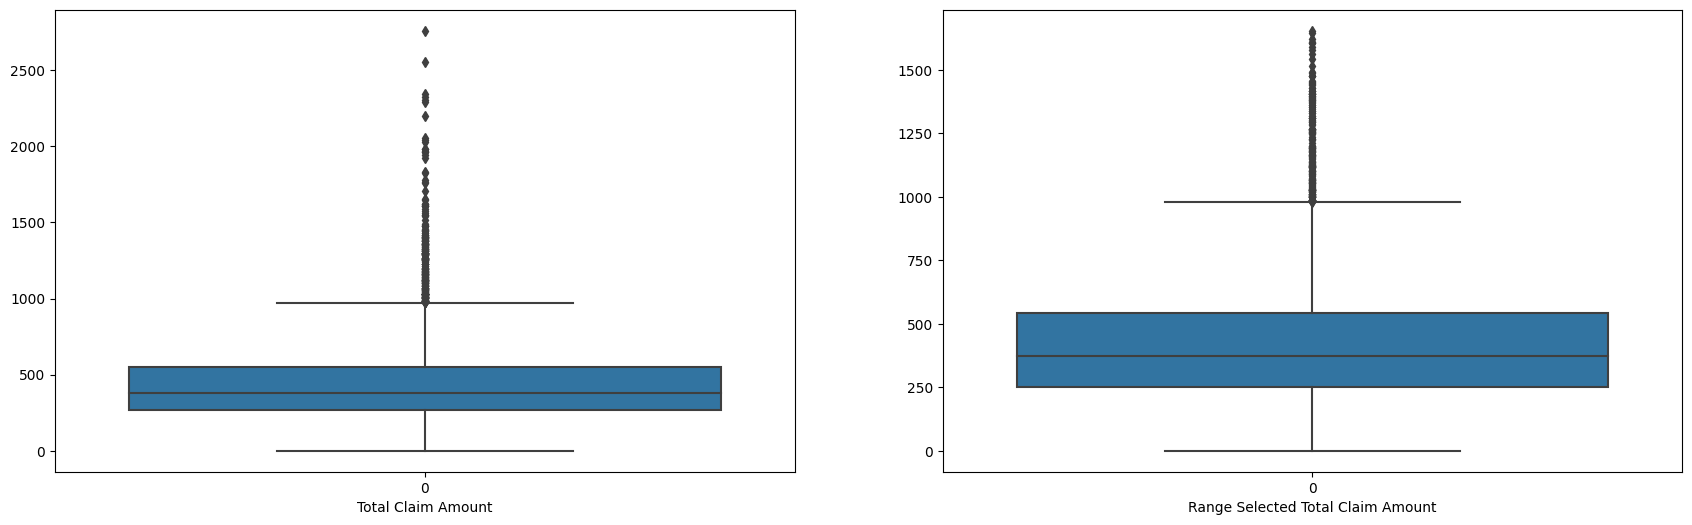

In [75]:
# Filtering
df_model = df_model[(df_model['Total Claim Amount'] <= 1777)]

# Plot distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(df['Total Claim Amount'], ax=axes[0])
sns.boxplot(df_model['Total Claim Amount'], ax=axes[1])
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');


In [76]:
# Descriptive statistics for 'Total Claim Amount'
df_model['Total Claim Amount'].describe()

count    4995.000000
mean      418.231779
std       265.736801
min         0.423310
25%       250.121023
50%       372.652536
75%       542.400000
max      1654.202174
Name: Total Claim Amount, dtype: float64

### d. Income

In [77]:
iqr('Income')

IQR Income= 62518.0
Upper Bound= 156295.0
Lower Bound= -93777.0


In [78]:
# Descriptive statistics for 'Income'
df_model['Income'].describe()

count     4995.000000
mean     37782.320921
std      30691.933168
min          0.000000
25%          0.000000
50%      34378.000000
75%      62518.000000
max      99934.000000
Name: Income, dtype: float64

All income values in this dataset fall within the lower and upper limits. Therefore, there is no need to drop any values from this column.

### e. Customer Lifetime Value

In [79]:
iqr('Customer Lifetime Value')

IQR Customer Lifetime Value= 4958.533044
Upper Bound= 16332.081735
Lower Bound= -3502.0504409999994


In [80]:
# Descriptive statistics for 'Customer Lifetime Value'
df_model['Customer Lifetime Value'].describe()

count     4995.000000
mean      7936.578198
std       6759.478906
min       1898.007675
25%       3935.749125
50%       5791.012841
75%       8894.282169
max      73225.956520
Name: Customer Lifetime Value, dtype: float64

In [81]:
# Check Customer Lifetime Value >15988.85
df_model[df_model['Customer Lifetime Value'] > 16332.08].count()['Customer Lifetime Value']

441

For this feature, any Customer Lifetime Value (CLV) values exceeding $15,988.85 will be dropped. This decision is based on the application of the IQR method. As there is no domain knowledge available to suggest an alternate upper bound for the IQR, since CLV is primarily determined by the customers' own performance and not influenced by factors such as location or other variables. (source= [link](https://www.qualtrics.com/au/experience-management/customer/how-to-calculate-customer-lifetime-value/?rid=ip&prevsite=en&newsite=au&geo=ID&geomatch=au))

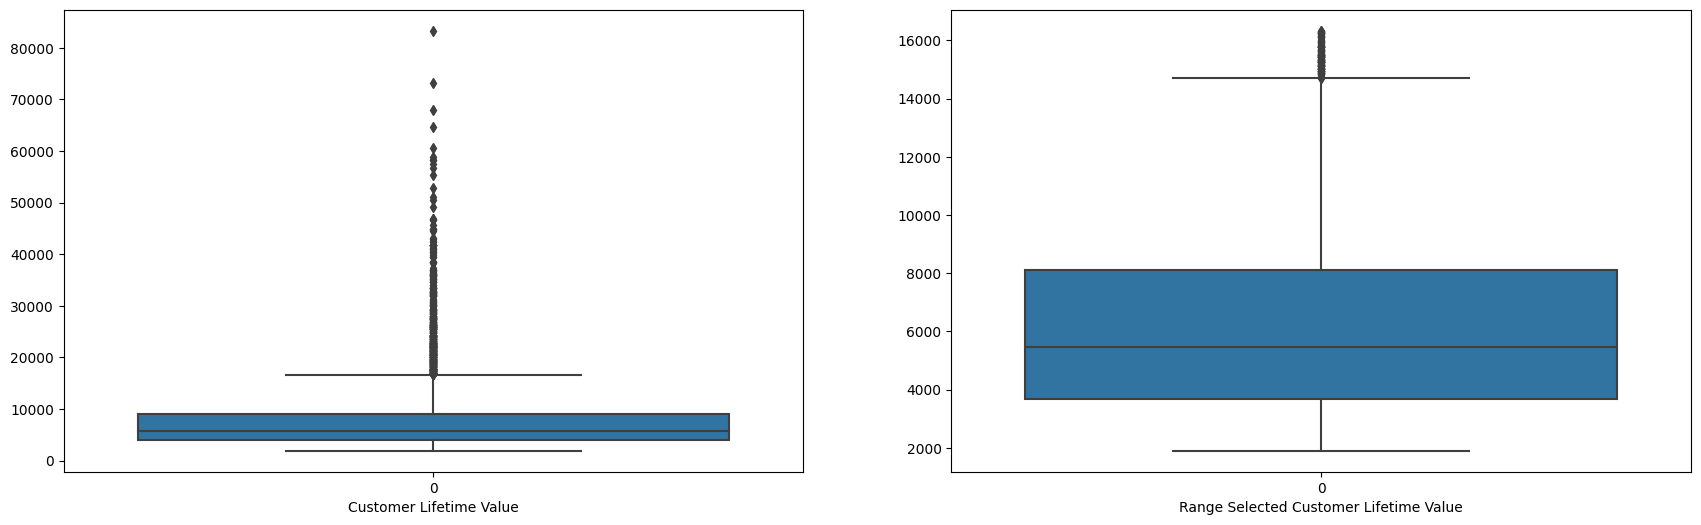

In [82]:
# Filtering
df_model = df_model[(df_model['Customer Lifetime Value'] <= 16332.08)]

# Plot distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.boxplot(df['Customer Lifetime Value'], ax=axes[0])
sns.boxplot(df_model['Customer Lifetime Value'], ax=axes[1])
axes[0].set_xlabel('Customer Lifetime Value')
axes[1].set_xlabel('Range Selected Customer Lifetime Value');


**Cleaned Dataset**

In [83]:
df_model.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [84]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            4554 non-null   object 
 1   Coverage                 4554 non-null   object 
 2   Renew Offer Type         4554 non-null   object 
 3   EmploymentStatus         4554 non-null   object 
 4   Marital Status           4554 non-null   object 
 5   Education                4554 non-null   object 
 6   Number of Policies       4554 non-null   float64
 7   Monthly Premium Auto     4554 non-null   float64
 8   Total Claim Amount       4554 non-null   float64
 9   Income                   4554 non-null   float64
 10  Customer Lifetime Value  4554 non-null   float64
dtypes: float64(5), object(6)
memory usage: 556.0+ KB


Missing values, duplicates, and outliers has been handled. As a result, we are left with 4554 rows of data to be used for modeling. 1121 customer data (19.77%%) was being eliminated through the process of dropping duplicates and outliers.


## **Data Preprocessing**

In this step of data preprocessing, we will perform various tasks to ensure the dataset is suitable for modeling. The following step will be made = 
- Defining the features (as the independent variables) and target variable (dependent variable)
- Split 80-20 data into train set and test set
- Encoding to convert categorical features into numerical formatting
- Scaling to adjust the features' scales.

**Data Splitting & Train and Test Splitting**

In [86]:
# Determine independent variable and target
x = df_model.drop(columns='Customer Lifetime Value')
y = df_model['Customer Lifetime Value']

# Data solit into train and test set with 80:20 proportion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state= 0)

**Encoding**

To include all selected features in the modeling process, it is necessary to convert categorical features into numerical format. 

In the case of 'Coverage' and 'Education' features, which are categorized as ordinal variables, it is appropriate to use Ordinal encoders to convert them into numerical representations that preserve the ordinal relationship between categories. Furthermore, for the remaining categorical features, I'm utilizzing OneHot encoding. 

By employing a combination of Ordinal encoding and OneHot encoding within the ColumnTransformer function, all categorical features are appropriately transformed into numerical format, allowing them to be included in the machine learning model.

In [184]:
# Convert the value of categorical categories into numerics
mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5}}
]

# Combine onehot and ordinal encoders in COlumnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Renew Offer Type', 'Marital Status']),
    ('ordinal', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=mapping), ['Coverage', 'Education'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'EmploymentStatus',
                                  'Renew Offer Type', 'Marital Status']),
                                ('ordinal',
                                 OrdinalEncoder(cols=['Coverage', 'Education'],
                                                mapping=[{'col': 'Coverage',
                                                          'data_type': dtype('O'),
                                                          'mapping': Basic       1
Extended    2
Premium     3
dtype: int64},
                                                         {'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': High School or Below    1
College                 2
Bachelor                3
Master                

**Scaler**

To standardize the values of each feature and bring them to a comparable scale, I will apply a scaling technique. For the initial scaling step, I will use RobustScaler as it is more robust to outliers compared to other scalers, since it is less influenced by outliers. 

During the hyperparameter tuning step, the performance of different scalers can be evaluated, and the best scaler can be chosen based on the model's performance metrics. This will help determine the most appropriate scaler for this specific model and dataset.

In [185]:
robust = RobustScaler()


## **Modeling**

From the dataset's information, a regression model is more appropriate for this project since the target variable is continuous. In the modeling step, cross-validation will be performed to determine the benchmark model. Seven different regression models will be tested during cross-validation, and the model with the best performance will be selected as the benchmark model for further tuning. To evaluate the performance of the regression models, several metrics will be used. These metrics include =

**Root Mean Squared Error (RMSE)** = 

RMSE measures the square root of the average squared difference between the predicted values and the actual values. It provides a measure of the overall model error, with smaller values indicating better performance. However, RMSE is sensitive to outliers in the data.

**Mean Absolute Error (MAE)** = 

MAE calculates the average absolute difference between the predicted values and the actual values. It provides a measure of the average magnitude of the errors, regardless of their direction. Smaller MAE values indicate better model performance.

**Mean Absolute Percentage Error (MAPE)** = 

MAPE measures the average percentage difference between the predicted values and the actual values. Like MAE, smaller MAPE values indicate better model performance.

By evaluating these metrics using cross-validation, we can determine the performance of each model and compare their accuracy. The mean and standard deviation of these metrics across the cross-validation will provide an indication of the model's overall performance and variability.
The model with the smallest values for RMSE, MAE, and MAPE, indicating lower errors, will be selected as the benchmark model for further tuning and refinement.

**Cross Validation**

In [87]:
# Empty lists to append the results
score_rmse = []
mean_rmse = []
std_rmse = []

score_mae = []
mean_mae = []
std_mae = []

score_mape = []
mean_mape = []
std_mape = []

In [88]:
# Define algorithms
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state= 0)
rf = RandomForestRegressor(random_state= 0)
xgb = XGBRegressor(random_state= 0)
ada = AdaBoostRegressor(random_state= 0)
gb = GradientBoostingRegressor(random_state= 0)

models = [lr, knn, dt, rf, ada, xgb, gb]
score = {'rmse': 'neg_root_mean_squared_error',
         'mae': 'neg_mean_absolute_error',
         'mape': 'neg_mean_absolute_percentage_error'}

# Best algorithm according to each metrics 
for i in models:

    pipeline = Pipeline([
        ('prepro',transformer),
        ('scaler',robust),
        ('algo',i)
    ])

    # RMSE

    model_cv_rmse = cross_val_score(
        pipeline, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    mean_rmse.append(model_cv_rmse.mean())
    std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        pipeline, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    mean_mae.append(model_cv_mae.mean())
    std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        pipeline, 
        x_train, 
        y_train, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    mean_mape.append(model_cv_mape.mean())
    std_mape.append(model_cv_mape.std())

[-2666.7684793  -2751.52383305 -2699.51240502 -2806.02504201
 -2745.24091062] LinearRegression()
[-2011.85967935 -2060.85826252 -2017.51560623 -2068.92393118
 -2013.55483502] LinearRegression()
[-0.35784099 -0.38438919 -0.38239622 -0.35863534 -0.38755376] LinearRegression()
[-2672.5846159  -2781.8990649  -2685.07248734 -2775.05277015
 -2930.08513822] KNeighborsRegressor()
[-1779.93216448 -1941.06928525 -1862.84595469 -1823.76738031
 -2004.2119004 ] KNeighborsRegressor()
[-0.32028653 -0.36596082 -0.36517383 -0.31095529 -0.39144579] KNeighborsRegressor()
[-1249.00971081 -1240.48229742 -1140.61974791 -1262.77831974
 -1102.88252625] DecisionTreeRegressor(random_state=0)
[-455.40443592 -436.81186873 -401.7262884  -453.10984523 -373.78676979] DecisionTreeRegressor(random_state=0)
[-0.05624402 -0.05530124 -0.0507446  -0.05523651 -0.04658761] DecisionTreeRegressor(random_state=0)
[-901.33988782 -908.95988973 -900.09884015 -985.03497216 -961.1649349 ] RandomForestRegressor(random_state=0)
[-368

In [89]:
# Evaluation of the results from candidate algorithm used
cv_before = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'AdaBoost Regressor', 'Gradient Boost Regressor'],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape
}).round(2)
cv_before.sort_values(by='Mean_RMSE', ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
6,Gradient Boost Regressor,-884.84,66.38,-376.88,10.04,-0.05,0.00
3,RandomForest Regressor,-931.32,35.07,-361.10,22.39,-0.04,0.00
5,AdaBoost Regressor,-980.29,16.81,-436.88,19.35,-0.07,0.00
2,DecisionTree Regressor,-1199.15,64.71,-424.17,31.67,-0.05,0.00
4,XGBoost Regressor,-1378.22,34.15,-992.04,47.92,-0.15,0.01
0,Linear Regression,-2733.81,47.60,-2034.54,24.98,-0.37,0.01
1,KNN Regressor,-2768.94,92.19,-1882.37,80.75,-0.35,0.03


According to the results, the best model is the Gradient Boost Regressor, followed by the Random Forest Regressor, based on the mean RMSE value. Although the Random Forest Regressor has slightly smaller mean MAE and MAPE values, the Gradient Boost Regressor outperforms it in terms of standard deviation across all metrics. Therefore, it can be concluded that the Gradient Boost Regressor is the best algorithm based on this cross-validation evaluation.

## **Hyperparameter Tuning**

According to the cross validation result before, Gradient Boost has the best performance. So in this step, I will be tuning this model in the aim to enhance its performance.

The Gradient Boosting Regressor is a powerful algorithm that falls under the supervised learning ensemble approach. It operates by constructing multiple weak models, typically decision trees, in a sequential manner and then combining them to achieve improved overall performance. Each subsequent weak model is built to correct the errors made by the previous models, gradually refining the prediction accuracy. This iterative process of boosting creates a strong predictive model that effectively captures complex patterns and relationships in the data, leading to enhanced performance and robust predictions.

Due to hardware limitations, I will initially employ RandomizedSearch to explore a wider range of hyperparameters. Following that, I will utilize GridSearch with the top five models resulting from RandomizedSearch to narrow down the parameter range. This two-step process helps minimize the parameter space and optimize the model's performance.

For this tuning step, I am referring to the scikit-learn documentation for the Gradient Boosting Regressor. (Source = [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html))


**RandomizedSearchCV**

In [137]:
# Define scaler
robust = RobustScaler()
minmax = MinMaxScaler()
standard= StandardScaler()
scaler = [robust,standard, minmax]

# The number of boosting stages to perform
n_estimators = list(np.arange(100, 3001, 100))

# Learning Rate
learning_rate = list(np.arange(0.001, 1, 0.001))
# A lower learning rate requires more trees to model the data but can lead to better generalization.

# Maximum depth of each individual decision tree in the ensemble.
max_depth = list(np.arange(3,10, 1))

# The fraction of samples (rows) to be used for training each tree. 
subsample = list(np.arange(.5, .9, .01))

# The number of features to consider when looking for the best split during tree construction
max_features = list(np.arange(0.1, 1, .01))

# The minimum number of samples required to split an internal node

# Hyperparameter
hyperparam = {
    'algo__n_estimators':n_estimators,
    'algo__learning_rate':learning_rate,
    'algo__max_depth':max_depth , 
    'algo__subsample':subsample,
    'algo__max_features':max_features,
    # 'algo__min_samples_split': min_samples_split,
    'scaler':scaler
}

# Pipeline
pipeline_gb = Pipeline([
    ('prepro', transformer),
    ('scaler', robust),
    ('algo', gb)
])


rand_search = RandomizedSearchCV(
    estimator=pipeline_gb,
    param_distributions=hyperparam,
    n_iter=10000,
    cv=5,
    scoring= ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs=-1,
    refit='neg_root_mean_squared_error',
    random_state=1

)


In [138]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('prepro',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Marita

In [140]:
pd.DataFrame(rand_search.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_algo__subsample,param_algo__n_estimators,param_algo__max_features,param_algo__max_depth,param_algo__learning_rate,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
8235,1.840332,0.010828,0.015481,0.001185,MinMaxScaler(),0.86,800,0.8,3,0.012,...,10.596767,42,-0.046573,-0.046521,-0.045824,-0.047705,-0.047246,-0.046774,0.000648,38
2714,1.731479,0.046995,0.020185,0.003111,RobustScaler(),0.57,1200,0.58,3,0.009,...,11.206643,59,-0.047860,-0.047848,-0.046806,-0.049331,-0.047652,-0.047899,0.000814,63
3761,1.912709,0.080641,0.023240,0.002076,MinMaxScaler(),0.77,1300,0.5,3,0.01,...,10.261433,68,-0.048442,-0.049191,-0.047244,-0.049378,-0.047937,-0.048438,0.000791,70
4814,0.655391,0.056117,0.008332,0.002220,StandardScaler(),0.69,300,0.9,3,0.033,...,8.594375,63,-0.048773,-0.047825,-0.047307,-0.048426,-0.048931,-0.048252,0.000606,68
2257,2.027275,0.069584,0.018101,0.000699,MinMaxScaler(),0.66,900,0.96,3,0.012,...,8.639481,90,-0.049896,-0.049505,-0.048254,-0.049927,-0.049257,-0.049368,0.000610,87


In [142]:
pd.set_option('display.max_columns', None)
pd.DataFrame(rand_search.cv_results_).columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_scaler', 'param_algo__subsample', 'param_algo__n_estimators',
       'param_algo__max_features', 'param_algo__max_depth',
       'param_algo__learning_rate', 'params',
       'split0_test_neg_root_mean_squared_error',
       'split1_test_neg_root_mean_squared_error',
       'split2_test_neg_root_mean_squared_error',
       'split3_test_neg_root_mean_squared_error',
       'split4_test_neg_root_mean_squared_error',
       'mean_test_neg_root_mean_squared_error',
       'std_test_neg_root_mean_squared_error',
       'rank_test_neg_root_mean_squared_error',
       'split0_test_neg_mean_absolute_error',
       'split1_test_neg_mean_absolute_error',
       'split2_test_neg_mean_absolute_error',
       'split3_test_neg_mean_absolute_error',
       'split4_test_neg_mean_absolute_error',
       'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
       'rank_test_neg_mean_absolute_er

In [139]:
rand_search.best_score_

-883.1399137499617

In [141]:
rand_search.best_params_


{'scaler': MinMaxScaler(),
 'algo__subsample': 0.8600000000000003,
 'algo__n_estimators': 800,
 'algo__max_features': 0.7999999999999996,
 'algo__max_depth': 3,
 'algo__learning_rate': 0.012}

According to the hyperparameter tuning with RandomizedSearchCV, the model that I'm using has slightly improved, with =

**BEFORE TUNING          = 884.84**


**AFTER RANDOMIZEDSEARCH = 883.140**

RandomizedSearch also found the best parameters for this models including =
- Scaler            = MinMaxScaler()
- SubSample         = 0.86
- N-Estimators      = 800
- Max_Features      = 0.80
- Max_Depth         = 3
- Learning_Rate     = 0.012

It is odd that MinMaxScaler() is identified as the best scaler according to the RandomizedSearch results, considering the presence of outliers in our dataset. To clarify the suitability of MinMaxScaler() as the best scaler for this model and to further optimize the model's performance, I will proceed with GridSearch. This approach involves using the top 5 best parameter combinations obtained from the RandomizedSearch and evaluating their impact on the model's performance.

By performing GridSearch, we can conduct a more thorough exploration of the parameter space and identify the scaler that yields the best performance for our specific dataset. This process will enable us to make a more informed decision regarding the scaler and maximize the overall performance of the model in handling the outlier presence effectively.

In [144]:
top_random = pd.DataFrame(rand_search.cv_results_)[['param_scaler', 
                                                    'param_algo__subsample',
                                                    'param_algo__n_estimators',
                                                    'param_algo__max_features',
                                                    'param_algo__max_depth',
                                                    'param_algo__learning_rate',
                                                    'mean_test_neg_root_mean_squared_error',
                                                    'std_test_neg_root_mean_squared_error',
                                                    'rank_test_neg_root_mean_squared_error',  
                                                    'mean_test_neg_mean_absolute_error', 
                                                    'std_test_neg_mean_absolute_error',
                                                    'rank_test_neg_mean_absolute_error',
                                                    'mean_test_neg_mean_absolute_percentage_error',
                                                    'std_test_neg_mean_absolute_percentage_error',
                                                    'rank_test_neg_mean_absolute_percentage_error']].sort_values('rank_test_neg_root_mean_squared_error')

top_random = top_random.head(5).sort_values('rank_test_neg_root_mean_squared_error')
top_random

,param_scaler,param_algo__subsample,param_algo__n_estimators,param_algo__max_features,param_algo__max_depth,param_algo__learning_rate,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
8235,MinMaxScaler(),0.86,800,0.8,3,0.012,-883.139914,63.678757,1,-368.139490,10.596767,42,-0.046774,0.000648,38
2714,RobustScaler(),0.57,1200,0.58,3,0.009,-884.186625,62.790590,2,-372.004993,11.206643,59,-0.047899,0.000814,63
3761,MinMaxScaler(),0.77,1300,0.5,3,0.01,-884.400926,62.398142,3,-374.202537,10.261433,68,-0.048438,0.000791,70
4814,StandardScaler(),0.69,300,0.9,3,0.033,-885.756405,62.862640,4,-373.069013,8.594375,63,-0.048252,0.000606,68
2257,MinMaxScaler(),0.66,900,0.96,3,0.012,-885.943358,60.080506,5,-378.662956,8.639481,90,-0.049368,0.000610,87


**GRIDSEARCH**

In [147]:
pipeline_gb = Pipeline([
    ('prepro', transformer),
    ('scaler', 'passthrough'),
    ('algo', gb)
])

hyperparam = {
    'scaler' : [MinMaxScaler(), RobustScaler(), StandardScaler()],
    'algo__subsample':[0.57,0.66,.69,.77,.86],
    'algo__n_estimators':[300,800,900,1200,1300],
    'algo__max_features':[.5,.58,.8,.9,.96],
    'algo__max_depth':[3] , 
    'algo__learning_rate':[0.012,.009,.01,.033],
}


gridsearch = GridSearchCV(
    estimator= pipeline,
    param_grid= hyperparam,
    cv= 5,
    scoring= ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs= -1,
    refit= 'neg_root_mean_squared_error',
    error_score= 'raise'
)

In [148]:
gridsearch.fit(x_train,y_train)


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('prepro',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Vehicle '
                                                                          'Class',
                                                                          'EmploymentStatus',
                                                                          'Renew '
                                                                          'Offer '
                                                                          'Type',
                                                                          'Marital '
                                               

In [149]:
pd.DataFrame(gridsearch.cv_results_).sort_values(\
    by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__learning_rate,param_algo__max_depth,param_algo__max_features,param_algo__n_estimators,param_algo__subsample,param_scaler,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
643,2.322573,0.098088,0.015424,0.001659,0.009,3,0.9,900,0.86,RobustScaler(),"{'algo__learning_rate': 0.009, 'algo__max_dept...",-778.731849,-858.011022,-900.187315,-901.441280,-968.020447,-881.278382,62.201990,1,-360.367227,-365.351841,-360.833702,-382.573099,-371.508300,-368.126834,8.261123,139,-0.046814,-0.046752,-0.045761,-0.047090,-0.045999,-0.046483,0.000511,175
644,2.265011,0.067536,0.017954,0.002346,0.009,3,0.9,900,0.86,StandardScaler(),"{'algo__learning_rate': 0.009, 'algo__max_dept...",-778.673030,-858.075690,-900.412539,-901.456804,-967.870358,-881.297684,62.189511,2,-360.033987,-365.204878,-361.782359,-382.378042,-371.660264,-368.211906,8.121948,150,-0.046705,-0.046695,-0.045835,-0.047000,-0.046037,-0.046454,0.000442,168
642,2.314734,0.109781,0.016812,0.001739,0.009,3,0.9,900,0.86,MinMaxScaler(),"{'algo__learning_rate': 0.009, 'algo__max_dept...",-779.051604,-858.335723,-901.104297,-901.208199,-968.049015,-881.549768,62.122007,3,-359.708561,-365.463022,-361.337924,-382.482615,-371.690059,-368.136436,8.280544,142,-0.046629,-0.046738,-0.045724,-0.047044,-0.046011,-0.046429,0.000487,165
1002,2.090964,0.087681,0.018039,0.003850,0.01,3,0.9,800,0.86,MinMaxScaler(),"{'algo__learning_rate': 0.01, 'algo__max_depth...",-778.677342,-860.374654,-901.108249,-900.988824,-966.840465,-881.597907,61.751152,4,-359.745661,-366.706673,-360.568604,-384.382968,-372.380084,-368.756798,9.052685,186,-0.046511,-0.047103,-0.045542,-0.047410,-0.046148,-0.046543,0.000667,184
1004,2.109848,0.031080,0.016880,0.004697,0.01,3,0.9,800,0.86,StandardScaler(),"{'algo__learning_rate': 0.01, 'algo__max_depth...",-779.182441,-859.813980,-901.324380,-901.146504,-966.984883,-881.690438,61.685722,5,-360.486752,-366.546238,-361.162089,-384.637393,-372.420826,-369.050660,8.901084,204,-0.046588,-0.047069,-0.045641,-0.047475,-0.046186,-0.046592,0.000645,194


In [150]:
gridsearch.best_score_


-881.2783824299244

In [151]:
gridsearch.best_params_


{'algo__learning_rate': 0.009,
 'algo__max_depth': 3,
 'algo__max_features': 0.9,
 'algo__n_estimators': 900,
 'algo__subsample': 0.86,
 'scaler': RobustScaler()}

According to the hyperparameter tuning with GridSearch, the model that I'm using has slightly improved, with =

**BEFORE TUNING          = 884.84**

**AFTER RANDOMIZEDSEARCH = 883.140**

**AFTER GRIDSEARCH = 881.278**

These improvements indicate that the model's ability to predict the target variable, CLV, has been enhanced. GridSearch also found the best parameters for this models including =
- Scaler            = RobustScaler()
- SubSample         = 0.86
- N-Estimators      = 900
- Max_Features      = 0.9
- Max_Depth         = 3
- Learning_Rate     = 0.009

To further evaluate the performance of the best model identified by GridSearch, the next step is to compare its predictions to the test set. This will provide a comprehensive assessment of how well the model generalizes to unseen data and whether it outperforms the benchmark model.

## Predict to Test Sit (with Hyperparameter Tuning Model)

**Performance Comparison**

In [152]:
# Model
pipe_line = Pipeline([
    ('preprocessing', transformer),
    ('scaler', robust),
    ('model', gb)
])

score_rmse = []
score_mae=[]
score_mape=[]
    
# Model training
pipe_line.fit(x_train,y_train)

# Model predicting test set
y_pred_benchmark = pipe_line.predict(x_test)

score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_benchmark)))
score_mae.append(mean_absolute_error(y_test, y_pred_benchmark))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred_benchmark))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=['gb'])
score_before_tuning

,RMSE,MAE,MAPE
gb,737.223322,353.170353,0.049172


In [153]:
# Define model with best estimator (via GridSearch)
tuning_grid = gridsearch.best_estimator_

# Fitting model
tuning_grid.fit(x_train, y_train)

# Predict test set
y_pred_tuning_grid = tuning_grid.predict(x_test)

# Save RMSE, MAE & MAPE metrics values ​​after tuning_random
rmse_tuning_grid = np.sqrt(mean_squared_error(y_test, y_pred_tuning_grid))
mae_tuning_grid = mean_absolute_error(y_test, y_pred_tuning_grid)
mape_tuning_grid = mean_absolute_percentage_error(y_test, y_pred_tuning_grid)

score_after_tuning_grid = pd.DataFrame({'RMSE': rmse_tuning_grid, 'MAE': mae_tuning_grid, 'MAPE': mape_tuning_grid}, index= ['gboost']).round(3)
score_after_tuning_grid

,RMSE,MAE,MAPE
gboost,736.749,347.643,0.047


In [154]:
display(score_before_tuning, score_after_tuning_grid)


,RMSE,MAE,MAPE
gb,737.223322,353.170353,0.049172


,RMSE,MAE,MAPE
gboost,736.749,347.643,0.047


The comparison revealed that the tuned model exhibited improvements in terms of RMSE, MAE, and MAPE values compared to the benchmark model. The RMSE value decreased from 737.22 (benchmark model) to 736.75 (tuned model), indicating a slightly better accuracy in predicting the target variable.

To further analyze the model's performance, a residual plot was generated. The residual plot provides a visual representation of the differences between the predicted and actual values. By examining the distribution of residuals, we can identify any patterns or biases in the model's predictions.

## Evaluation by Residual Plot

In [155]:
# Membuat dataframe berisi data observasi, hasil prediksi, dan residual
df_result = df_model[['Customer Lifetime Value']].copy()
df_result['y_pred'] = tuning_grid.predict(x)
df_result['residual'] = df_result['Customer Lifetime Value'] - df_result['y_pred']
df_result

,Customer Lifetime Value,y_pred,residual
0,10083.486880,10650.402024,-566.915144
1,4943.386117,5110.410870,-167.024753
2,11981.984810,9897.296707,2084.688103
3,4550.856045,4396.153322,154.702723
4,2372.155492,2417.594872,-45.439380
...,...,...,...
5663,8114.409136,9196.560536,-1082.151400
5664,2442.216651,2592.496077,-150.279426
5665,12904.943360,12821.364452,83.578908
5666,2447.053134,2464.952635,-17.899501


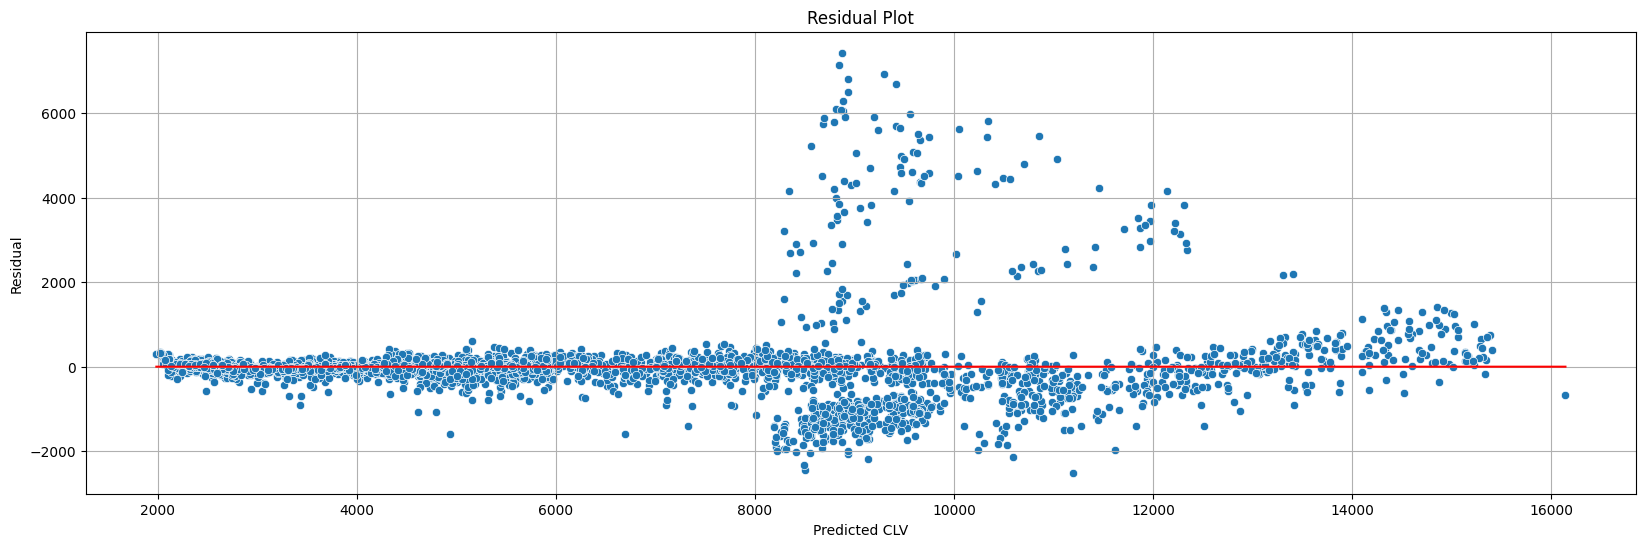

In [171]:
# Residual Plot
plt.figure(figsize=(20,6))

sns.scatterplot(data=df_result, x='y_pred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='y_pred', y=0, color='r')
plt.grid(True);

From the residual plot, it can be observed that the prediction model performs accurately in predicting CLV values below $8000, as the errors for this range are distributed near zero. However, there is a significant spread of errors in the range of $8000-$10000, indicating that the model may struggle to accurately predict CLV within this range. As the CLV values increase towards $16000, the errors gradually decrease and approach zero.

To further analyze the model's performance within specific ranges of CLV, a segmentation approach was employed. The dataset was divided into segments based on the CLV values, allowing for a more focused evaluation of the model's predictive capabilities within each segment. This segmentation approach will provide insights into which range of CLV the model can predict with the highest accuracy.

In [179]:
y_seg1 = y_test[y_test <= 4000]
y_seg2 = y_test[y_test.between(4000, 8000)]
y_seg3 = y_test[y_test.between(8000, 12000)] 
y_seg4 = y_test[y_test >= 12000]

x_seg1 = x_test.loc[y_test[y_test <= 4000].index]
x_seg2 = x_test.loc[y_test[y_test.between(4000,8000)].index]
x_seg3= x_test.loc[y_test[y_test.between(8000,12000)].index]
x_seg4 = x_test.loc[y_test[y_test >= 12000].index]

x_seg = [x_seg1,x_seg2,x_seg3,x_seg4]
y_seg=[y_seg1,y_seg2,y_seg3,y_seg4]

rmse_score = []
mae_score = []
mape_score = []

for x, y in zip(x_seg, y_seg):
    estimator=  gridsearch.best_estimator_
    estimator.fit(x_train, y_train)
    y_pred_seg = estimator.predict(x)
    rmse_score.append(np.sqrt(mean_squared_error(y, y_pred_seg)))
    mae_score.append(mean_squared_error(y, y_pred_seg))
    mape_score.append(mean_absolute_percentage_error(y, y_pred_seg))

ranges = ['<= $4000', '$4000 - $8000', '$8000 - $12000', '>= $12000']
score_seg = pd.DataFrame({
    'Range':ranges,
    'RMSE Score': rmse_score,
    'MAE Score':mae_score,
    'MAPE Score': mape_score
})
score_seg


,Range,RMSE Score,MAE Score,MAPE Score
0,<= $4000,184.948296,3.420587e+04,0.033976
1,$4000 - $8000,545.930043,2.980396e+05,0.046476
2,$8000 - $12000,820.663874,6.734892e+05,0.060450
3,>= $12000,1932.631840,3.735066e+06,0.072362


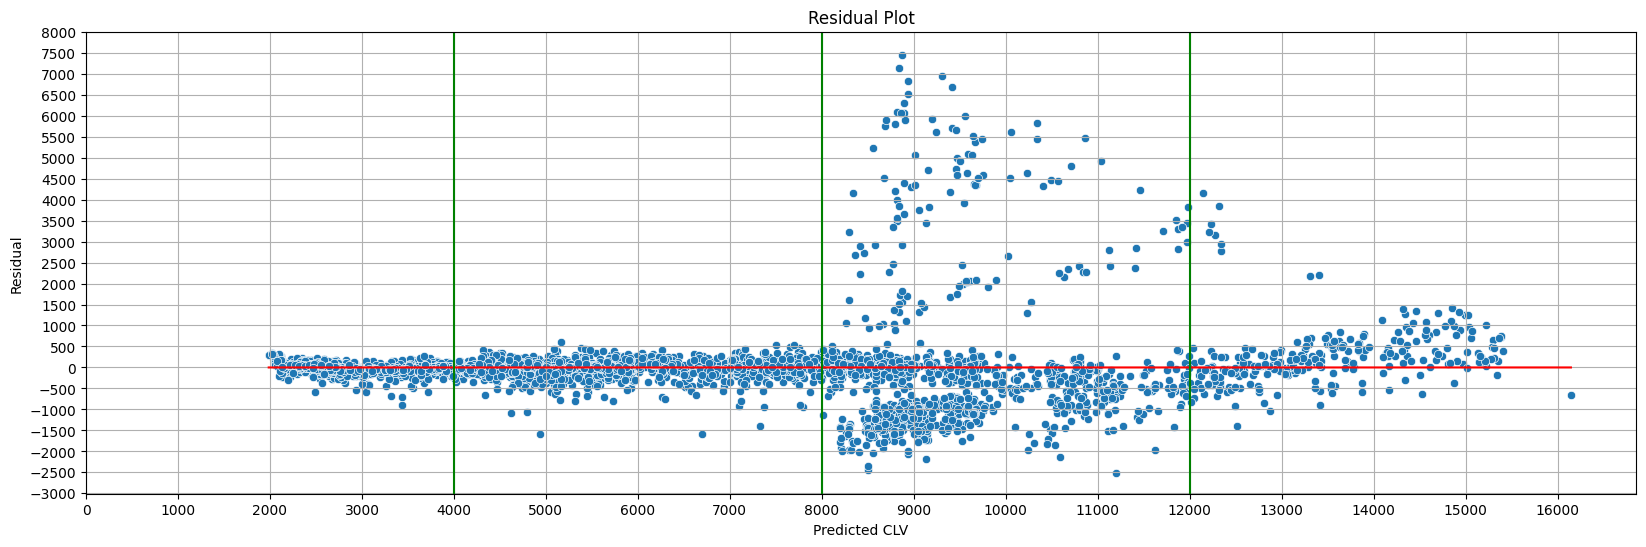

In [173]:
plt.figure(figsize=(20,6))

sns.scatterplot(data=df_result, x='y_pred', y='residual').set(title='Residual Plot', xlabel='Predicted CLV', ylabel='Residual')
sns.lineplot(data=df_result, x='y_pred', y=0, color='r')
plt.grid(True)

for i in range(4000, 12001, 4000):
    plt.axvline(i, color='green')

x_tick_values = range(0, 16001, 1000)
y_tick_values = range(-3000, 8001, 500)
plt.xticks(x_tick_values)
plt.yticks(y_tick_values);

The plot shows the segmentation that I did before, as we can see, the DataFrame shows that CLV ranged <= $4000 has the best prediction in this model, and the worst prediction is in the forth range (>= $12000)

# Feature Importance

In [180]:
# Getting the features out from each 'point' in transformer
f_onehot = transformer.named_transformers_['onehot'].get_feature_names_out()
f_ordinal = transformer.transformers[1][1].cols
f_remain = x_train.iloc[:, transformer.transformers_[2][2]].columns

# Combine all features
all_feature = list(f_onehot) + list(f_ordinal) + list(f_remain)

# Make a DataFrame
feature_imp = pd.DataFrame({
    'feature' : all_feature,
    'imp' : tuning_grid['algo'].feature_importances_
}).sort_values('imp', ascending=False)

feature_imp

,feature,imp
16,Number of Policies,0.682719
17,Monthly Premium Auto,0.298914
19,Income,0.007398
18,Total Claim Amount,0.002624
2,Vehicle Class_SUV,0.002464
5,EmploymentStatus_Employed,0.001452
12,Marital Status_Married,0.000955
15,Education,0.000531
14,Coverage,0.000464
0,Vehicle Class_Luxury Car,0.000438


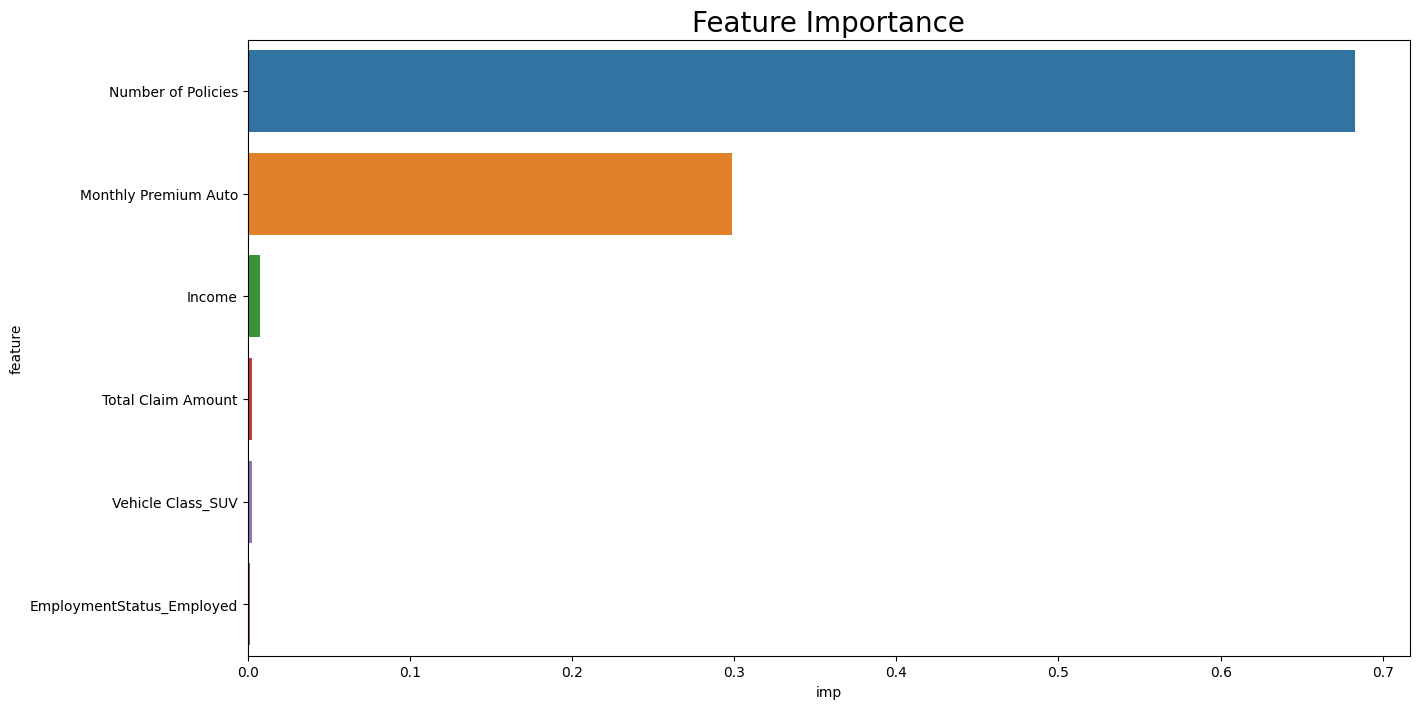

In [186]:
# Bar feature importance
plt.figure(figsize=(15,8))
sns.barplot(data=feature_imp.head(6), x='imp', y='feature')
plt.title('Feature Importance', size=20);

This bar graph displays the top 5 features that have the highest importance in predicting the target variable (CLV). The results from the feature importance analysis align with the findings from the heatmap correlation analysis conducted previously, which concluded that the strongest correlation among the numerical features and the target variable is observed with the 'Number of Policies' feature (correlation coefficient of 0.49), indicating that it has the strongest impact on the target variable among all the numerical features examined.

The second most important feature, as per the bar graph and correlation heatmap, is the 'Monthly Premium Auto'. While it is not as influential as the 'Number of Policies' feature, it still holds a significant importance value and demonstrates a notable influence on the target variable. The remaining features in the top 5 list exhibit importance values below 0.1. This suggests that their individual impacts on the target variable are relatively weaker compared to the top two features.

## Model Limitation

- Model provides reliable and accurate predictions only within the range of features present in the dataset. It may face limitations when predicting CLV values that exceed this range, resulting in decreased accuracy.
- Hardware limitations impose restrictions on the model's performance and parameter tuning capabilities, which affects the model's ability to find the optimal set of hyperparameters.

# Conclusion

- Best model according to cross validation is Gradient Boost Regressor
- There is a slight improvement of performance when tuning is being performed to the benchmark model, with the most accurate prediction lies in the first segment (below $4000 CLV)
- Best parameter to model = 
    - Scaler            = RobustScaler()
    - SubSample         = 0.86
    - N-Estimators      = 900
    - Max_Features      = 0.9
    - Max_Depth         = 3
    - Learning_Rate     = 0.009
- The 'Number of Policies' and 'Monthly Premium Auto' features have been identified as the most influential factors in determining CLV

To conclude, this machine learning model can assist the marketing and finance teams in identifying high-value customers and designing targeted campaigns. The model provides accurate predictions of customer lifetime value (CLV) with an average error percentage between 3% to 7% across segmented ranges. This enables personalized offers and promotions based on individual customer CLV, maximizing customer retention and cross-selling opportunities. Ultimately, the model enhances marketing strategies and financial performance by focusing on high-value customers and their specific needs.

# Recommendations

**Recommendation for Model**
- Adding additional features that are known to be related to CLV in car insurance. Some potential features to consider are Claims History, Customer Tenure (the length of time a customer has been with the insurance company), and Customer Interaction (customer service calls or online interactions, can provide insights into engagement and satisfaction), Driving History (customer's driving record, including accidents, traffic violations). These features can provide valuable insights into customer behavior and help improve the accuracy of your CLV predictions.
- Regularly evaluate the model's performance and make necessary adjustments to ensure its accuracy and effectiveness in predicting CLV.
- Expand the range of hyperparameter tuning to explore a wider range of possible configurations for the model.
- Enhance the dataset by incorporating additional customers to improve the prediction accuracy. 

**Recommendation for Business**
- Design targeted marketing campaigns aimed at high-value customers. Tailor promotional offers, discounts, and incentives based on individual customer CLV to maximize customer retention and cross-selling opportunities.
- Implement customer segmentation based on CLV ranges to better understand customer behavior and preferences to help in developing personalized marketing strategies for different customer segments.
- Focus on building strong relationships with high-value customers to enhance retention rates


## **Save Model**

In [189]:
import pickle

# Best Model
tuning_grid= gridsearch.best_estimator_

# Fit
tuning_grid.fit(x,y)

# Save Model
pickle.dump(tuning_grid, open('model_gradientboost.sav', 'wb'))

In [190]:
# Load model
saved = pickle.load(open('model_gradientboost.sav', 'rb'))
saved

Pipeline(steps=[('prepro',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Renew Offer Type',
                                                   'Marital Status']),
                                                 ('ordinal',
                                                  OrdinalEncoder(cols=['Coverage',
                                                                       'Education'],
                                                                 mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                      